Jeff Box<br>
GT Data Science 2018<br>
Homework 5: matplotlib<br>
Date: 7-13-18<br>

# Homework Instructions

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurrin form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. 
In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. 
Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data
to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

As final considerations:

You must use the Pandas Library and the Jupyter Notebook.
You must use the Matplotlib library.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
Your scatter plots must include error bars. 
This will allow the company to account for variability between mice. 
You may want to look into pandas.DataFrame.sem for ideas on how to calculate this.
Remember when making your plots to consider aesthetics!

Your legends should not be overlaid on top of any data.
Your bar graph should indicate tumor growth as red and tumor reduction as green.
It should also include a label with the percentage change for each bar. You may want to consult this tutorial for relevant code snippets.

See Starter Workbook for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)

# Hints and Considerations

Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

You have been provided a starter notebook. Use the code comments as a guideline of steps you may wish to follow as you complete the assignment. You do not have to follow them step-for-step. Do not get bogged down in trying to interpret and accomplish each step.

Between these two exercises, the Pymaceuticals one is significantly more challenging. So choose that one only if you feel somewhat comfortable with the material covered so far. The Pymaceuticals example will require you to research a good bit on your own for hacked solutions to problems you'll experience along the way. If you end up choosing this exercise, feel encouraged to constantly refer to Stack Overflow and the Pandas Documentation. These are needed tools in every data analyst's arsenal.

Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always re-visit old problems.

Remember: There are many ways to skin a cat, and similarly there are many ways to approach a data problem. The key throughout, however, is to break up your task into micro tasks. Try answering questions like: "How does my Data Frame need to be structured for me to have the right X and Y axis?" "How do I build a basic scatter plot?" "How do I add a label to that scatter plot?" "Where would the labels for that scatter plot come from?". Again! Don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of smaller, bite-sized tasks.

Get help when you need it! There is never any shame in asking. But as always, ask a specific question. You'll never get a great answer to: "I'm lost." Good luck!

In [29]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [30]:
# File manipulation
mouse = "data/mouse_drug_data.csv"
ctrial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse)
trial_df = pd.read_csv(ctrial)

# Identify any duplicates
mouse_sorted = pd.DataFrame(mouse_df.duplicated()).sort_values(by=0, ascending=False)
trial_sorted = pd.DataFrame(trial_df.duplicated()).sort_values(by=0, ascending=False)
    #mouse_sorted.head()
    #trial_sorted.head()
    #trial_df.loc[137]

# Remove duplicate: identified ID = 137 is a duplicate in trial data
trial_df = trial_df.drop(trial_df.index[[137]])
    #print(len(trial_df)) 
    #brings the length of trial_df from 1893 to 1892

# Combine the data into a single dataset based on Mouse ID & reset index
merge_df = mouse_df.merge(trial_df, on="Mouse ID")

# Display the data table for preview
print(f'length of trial_df: {len(trial_df)}')
print(f'length of merge_df: {len(merge_df)}')
merge_df.head()

length of trial_df: 1892
length of merge_df: 1904


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [31]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_group = merge_df.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
mean_df = pd.DataFrame(mean_group).reset_index()
mean_df = mean_df[["Drug","Timepoint","Tumor Volume (mm3)"]]

# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [32]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_group = merge_df.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
sem_df = pd.DataFrame(sem_group).reset_index()
sem_df = sem_df[["Drug","Timepoint","Tumor Volume (mm3)"]]

# Preview DataFrame
sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [33]:
# Minor Data Munging to Re-Format the Data Frames
drug_df = mean_df.pivot("Timepoint","Drug","Tumor Volume (mm3)").reset_index()
drug_error_df = sem_df.pivot("Timepoint","Drug","Tumor Volume (mm3)").reset_index()

# Preview that Reformatting worked
drug_df.head()
drug_error_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


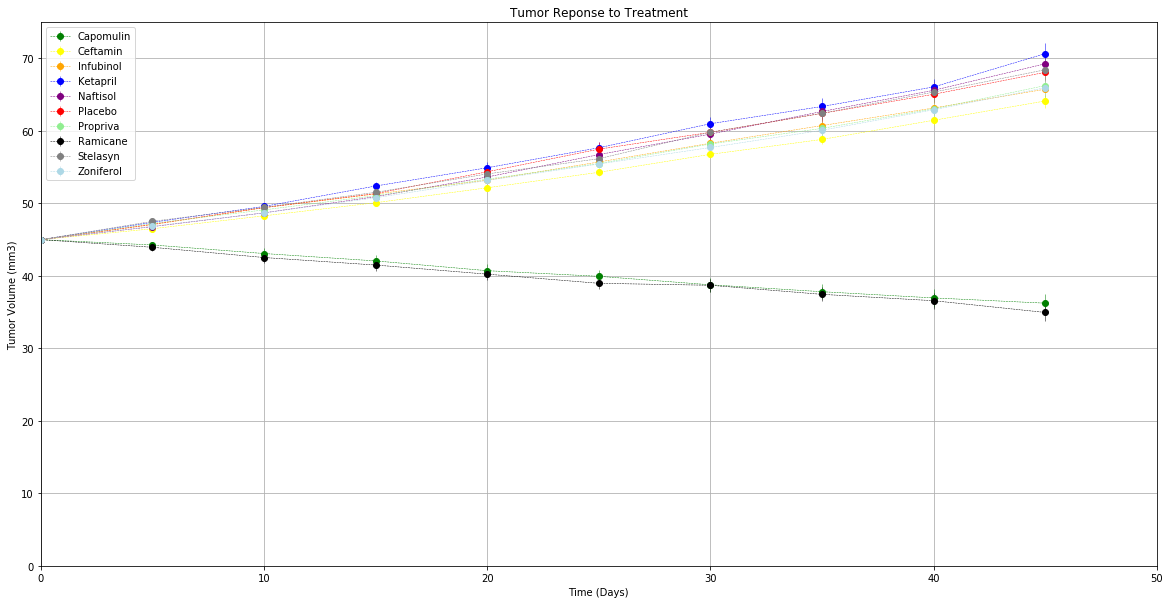

In [34]:
# Generate the Plot (with Error Bars)

#create x-axis from the munged df
x_axis = drug_df["Timepoint"]

#note: this could be done easier with a for loop, but i wasn't sure if the colors needed to match the example
# for drug in drug_df
    # for drug_sem in drug_error_df... etc

#tumor vol data!!!
Capomulin = drug_df["Capomulin"]
Ceftamin = drug_df["Ceftamin"]
Infubinol = drug_df["Infubinol"]
Ketapril = drug_df["Ketapril"]
Naftisol = drug_df["Naftisol"]
Placebo = drug_df["Placebo"]
Propriva = drug_df["Propriva"]
Ramicane = drug_df["Ramicane"]
Stelasyn = drug_df["Stelasyn"]
Zoniferol = drug_df["Zoniferol"]

#tumor vol error data!!!
Capomulin_sem = drug_error_df["Capomulin"]
Ceftamin_sem = drug_error_df["Ceftamin"]
Infubinol_sem = drug_error_df["Infubinol"]
Ketapril_sem = drug_error_df["Ketapril"]
Naftisol_sem = drug_error_df["Naftisol"]
Placebo_sem = drug_error_df["Placebo"]
Propriva_sem = drug_error_df["Propriva"]
Ramicane_sem = drug_error_df["Ramicane"]
Stelasyn_sem = drug_error_df["Stelasyn"]
Zoniferol_sem = drug_error_df["Zoniferol"]

#setting up the plot
fig, ax = plt.subplots(figsize=(20, 10))

#plots!! psst placebo is in red
ax.errorbar(x_axis, Capomulin, Capomulin_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('green'))
ax.errorbar(x_axis, Ceftamin, Ceftamin_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('yellow'))
ax.errorbar(x_axis, Infubinol, Infubinol_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('orange'))
ax.errorbar(x_axis, Ketapril, Ketapril_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('blue'))
ax.errorbar(x_axis, Naftisol, Naftisol_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('purple'))
ax.errorbar(x_axis, Placebo, Placebo_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('red'))
ax.errorbar(x_axis, Propriva, Propriva_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('lightgreen'))
ax.errorbar(x_axis, Ramicane, Ramicane_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('black'))
ax.errorbar(x_axis, Stelasyn, Stelasyn_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('gray'))
ax.errorbar(x_axis, Zoniferol, Zoniferol_sem, fmt="o", linestyle='dashed', linewidth=0.5, color=('lightblue'))

#format chart
plt.title("Tumor Reponse to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")
plt.grid(True)
plt.xlim(0, 50)
plt.ylim(0, 75)

# Save the Figure
plt.savefig("images/tumor_response_to_treatment.png")

In [35]:
# Show the Figure
plt.show()
#Analysis: cpomulin and remicane are the two showing decreases in tumors over time; large error span at final data point denoting potential randomness... but not enough to dismiss findings

## Metastatic Response to Treatment

In [36]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Already done in 'mean_group' dataframe

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_group).reset_index()
mean_met_df = mean_met_df[["Drug","Timepoint","Metastatic Sites"]]

# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [37]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

#already done in 'sem_group' dataframe

# Convert to DataFrame
sem_met_df = pd.DataFrame(sem_group).reset_index()
sem_met_df = sem_met_df[["Drug","Timepoint","Metastatic Sites"]]

# Preview DataFrame
sem_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [38]:
# Minor Data Munging to Re-Format the Data Frames
met_df = mean_met_df.pivot("Timepoint","Drug","Metastatic Sites").reset_index()
met_error_df = sem_met_df.pivot("Timepoint","Drug","Metastatic Sites").reset_index()

# Preview that Reformatting worked
met_df.head()
met_error_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


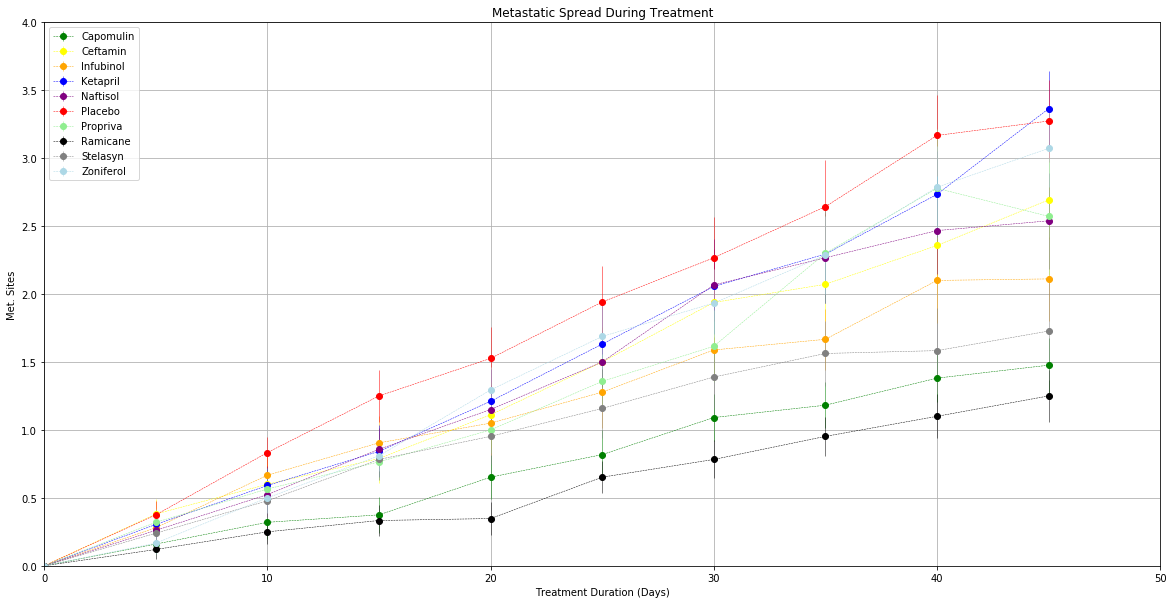

In [39]:
#note: again, this could be done with a for loop, but it was manually scripted for formatting purposes

#metastatic data!!!
Capomulin_met = met_df["Capomulin"]
Ceftamin_met = met_df["Ceftamin"]
Infubinol_met = met_df["Infubinol"]
Ketapril_met = met_df["Ketapril"]
Naftisol_met = met_df["Naftisol"]
Placebo_met = met_df["Placebo"]
Propriva_met = met_df["Propriva"]
Ramicane_met = met_df["Ramicane"]
Stelasyn_met = met_df["Stelasyn"]
Zoniferol_met = met_df["Zoniferol"]

#metastiatic error data!!!
Capomulin_sem_met = met_error_df["Capomulin"]
Ceftamin_sem_met = met_error_df["Ceftamin"]
Infubinol_sem_met = met_error_df["Infubinol"]
Ketapril_sem_met = met_error_df["Ketapril"]
Naftisol_sem_met = met_error_df["Naftisol"]
Placebo_sem_met = met_error_df["Placebo"]
Propriva_sem_met = met_error_df["Propriva"]
Ramicane_sem_met = met_error_df["Ramicane"]
Stelasyn_sem_met = met_error_df["Stelasyn"]
Zoniferol_sem_met = met_error_df["Zoniferol"]

#setting up the plot
fig, ax = plt.subplots(figsize=(20, 10))

#plots!! psst placebo is in red
ax.errorbar(x_axis, Capomulin_met, Capomulin_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('green'))
ax.errorbar(x_axis, Ceftamin_met, Ceftamin_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('yellow'))
ax.errorbar(x_axis, Infubinol_met, Infubinol_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('orange'))
ax.errorbar(x_axis, Ketapril_met, Ketapril_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('blue'))
ax.errorbar(x_axis, Naftisol_met, Naftisol_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('purple'))
ax.errorbar(x_axis, Placebo_met, Placebo_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('red'))
ax.errorbar(x_axis, Propriva_met, Propriva_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('lightgreen'))
ax.errorbar(x_axis, Ramicane_met, Ramicane_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('black'))
ax.errorbar(x_axis, Stelasyn_met, Stelasyn_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('gray'))
ax.errorbar(x_axis, Zoniferol_met, Zoniferol_sem_met, fmt="o", linestyle='dashed', linewidth=0.5, color=('lightblue'))

#format chart
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upper left")
plt.grid(True)
plt.xlim(0,50)
plt.ylim(0,4)

# Save the Figure
plt.savefig("images/met_spread_during_treatment.png")

## Survival Rates

In [40]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#mice_count = merge_df['Mouse ID'].unique()

mice_group = merge_df.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
count_df = pd.DataFrame(mice_group).reset_index()
count_df = count_df[['Drug','Timepoint','Mouse ID']]

# Preview DataFrame
count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [41]:
# Minor Data Munging to Re-Format the Data Frames
mice_df = count_df.pivot("Timepoint","Drug","Mouse ID").reset_index()

# Preview that Reformatting worked
mice_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,25,25,25,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [42]:
# Dataframe with percentages

#locate the starting number of mice for each drug trial
Capomulin_total = mice_df.iloc[0,1]
Ceftamin_total = mice_df.iloc[0,2]
Infubinol_total = mice_df.iloc[0,3]
Ketapril_total = mice_df.iloc[0,4]
Naftisol_total = mice_df.iloc[0,5]
Placebo_total = mice_df.iloc[0,6]
Propriva_total = mice_df.iloc[0,7]
Ramicane_total = mice_df.iloc[0,8]
Stelasyn_total = mice_df.iloc[0,9]
Zoniferol_total = mice_df.iloc[0,10]

#recalculate the dataframe as a % of the starting number of mice
mice_df['Capomulin'] = round(mice_df['Capomulin']/Capomulin_total*100,2)
mice_df['Ceftamin'] = round(mice_df['Ceftamin']/Ceftamin_total*100,2)
mice_df['Infubinol'] = round(mice_df['Infubinol']/Infubinol_total*100,2)
mice_df['Ketapril'] = round(mice_df['Ketapril']/Ketapril_total*100,2)
mice_df['Naftisol'] = round(mice_df['Naftisol']/Naftisol_total*100,2)
mice_df['Placebo'] = round(mice_df['Placebo']/Placebo_total*100,2)
mice_df['Propriva'] = round(mice_df['Propriva']/Propriva_total*100,2)
mice_df['Ramicane'] = round(mice_df['Ramicane']/Ramicane_total*100,2)
mice_df['Stelasyn'] = round(mice_df['Stelasyn']/Stelasyn_total*100,2)
mice_df['Zoniferol'] = round(mice_df['Zoniferol']/Zoniferol_total*100,2)

#preview
mice_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


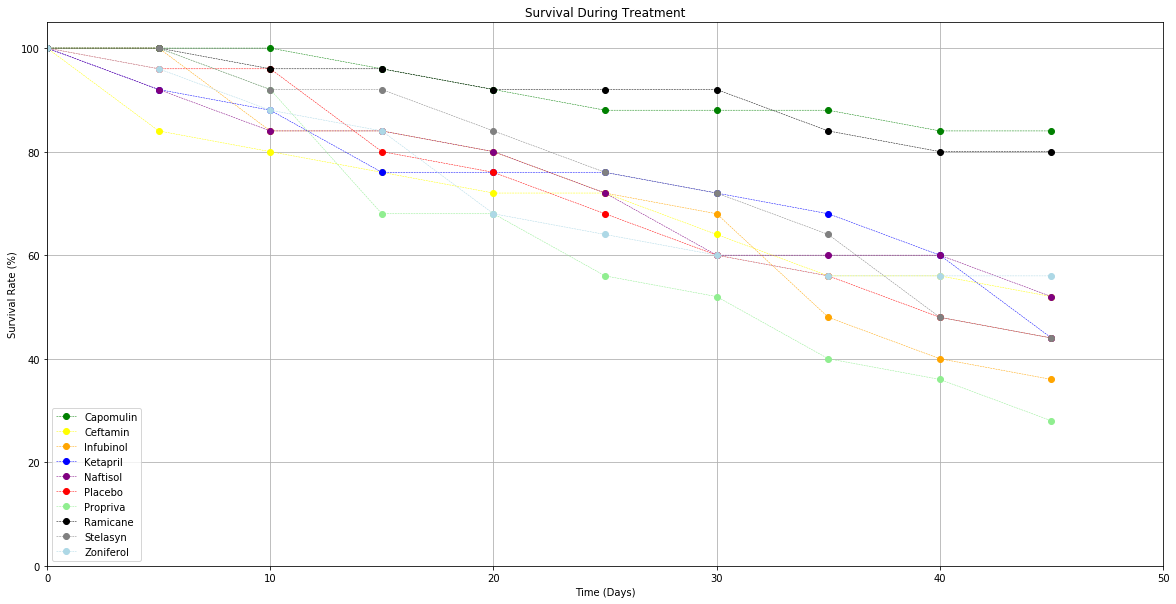

In [43]:
#set plot size
plt.figure(figsize=(20, 10))

# Generate the Plot (Accounting for percentages)
plt.plot(x_axis, mice_df['Capomulin'], color="green", label="Capomulin", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Ceftamin'], color="yellow", label="Ceftamin", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Infubinol'], color="orange", label="Infubinol", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Ketapril'], color="blue", label="Ketapril", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Naftisol'], color="purple", label="Naftisol", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Placebo'], color="red", label="Placebo", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Propriva'], color="lightgreen", label="Propriva", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Ramicane'], color="black", label="Ramicane", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Stelasyn'], color="gray", label="Stelasyn", marker="o", linestyle='dashed', linewidth=0.5)
plt.plot(x_axis, mice_df['Zoniferol'], color="lightblue", label="Zoniferol", marker="o", linestyle='dashed', linewidth=0.5)

#format chart
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")
plt.grid(True)
plt.xlim(0,50)
plt.ylim(0,105)

# Save the Figure
plt.savefig("images/survival_during_treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [44]:
drug_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [45]:
# Calculate the percent changes for each drug
pc_capomulin = round((drug_df.iloc[9,1]-drug_df.iloc[0,1])/drug_df.iloc[0,1]*100,2)
pc_ceftamin = round((drug_df.iloc[9,2]-drug_df.iloc[0,2])/drug_df.iloc[0,2]*100,2)
pc_infubinol = round((drug_df.iloc[9,3]-drug_df.iloc[0,3])/drug_df.iloc[0,3]*100,2)
pc_ketapril = round((drug_df.iloc[9,4]-drug_df.iloc[0,4])/drug_df.iloc[0,4]*100,2)
pc_naftisol = round((drug_df.iloc[9,5]-drug_df.iloc[0,5])/drug_df.iloc[0,5]*100,2)
pc_placebo = round((drug_df.iloc[9,6]-drug_df.iloc[0,6])/drug_df.iloc[0,6]*100,2)
pc_propriva = round((drug_df.iloc[9,7]-drug_df.iloc[0,7])/drug_df.iloc[0,7]*100,2)
pc_ramicane = round((drug_df.iloc[9,8]-drug_df.iloc[0,8])/drug_df.iloc[0,8]*100,2)
pc_stelasyn = round((drug_df.iloc[9,9]-drug_df.iloc[0,9])/drug_df.iloc[0,9]*100,2)
pc_zoniferol = round((drug_df.iloc[9,10]-drug_df.iloc[0,10])/drug_df.iloc[0,10]*100,2)

# Display the data to confirm
print(f'pc_capomulin: {pc_capomulin}')
print(f'pc_ceftamin: {pc_ceftamin}')
print(f'pc_infubinol: {pc_infubinol}')
print(f'pc_ketapril: {pc_ketapril}')
print(f'pc_naftisol: {pc_naftisol}')
print(f'pc_placebo: {pc_placebo}')
print(f'pc_propriva: {pc_propriva}')
print(f'pc_ramicane: {pc_ramicane}')
print(f'pc_stelasyn: {pc_stelasyn}')
print(f'pc_zoniferol: {pc_zoniferol}')

pc_capomulin: -19.48
pc_ceftamin: 42.52
pc_infubinol: 46.12
pc_ketapril: 57.03
pc_naftisol: 53.92
pc_placebo: 51.3
pc_propriva: 47.24
pc_ramicane: -22.32
pc_stelasyn: 52.09
pc_zoniferol: 46.58


In [26]:
# Store all Relevant Percent Changes into a df
pc_lists = [["capomulin", pc_capomulin], 
           ["ceftamin", pc_ceftamin], 
           ["infubinol",pc_infubinol], 
           ["ketapril",pc_ketapril], 
           ["naftisol",pc_naftisol], 
           ["placebo",pc_placebo], 
           ["propriva",pc_propriva], 
           ["ramicane",pc_ramicane], 
           ["stelasyn",pc_stelasyn], 
           ["zoniferol",pc_zoniferol]]

pc_df = pd.DataFrame(pc_lists,columns=['drug','pc'])
pc_df = pc_df.sort_values(by=['pc'], ascending=True)

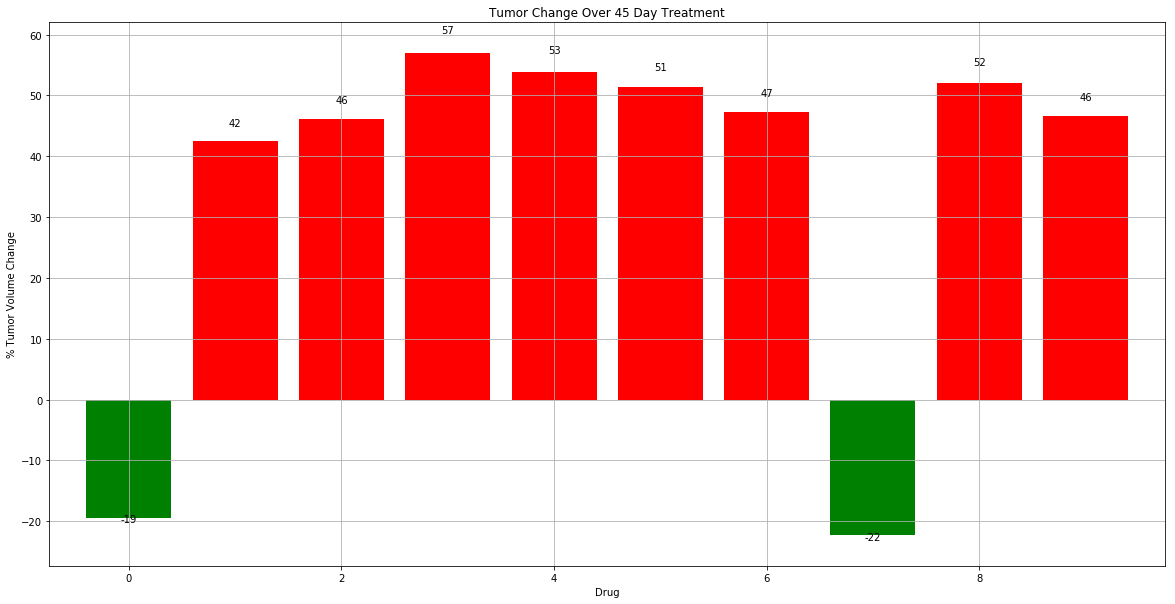

In [46]:
#store data in a tuple
pc_tuple = (pc_capomulin, pc_ceftamin, pc_infubinol, pc_ketapril, pc_naftisol, pc_placebo, pc_propriva, pc_ramicane, pc_stelasyn, pc_zoniferol)

#create axis
x_axis_labels = ["capomulin","ceftamin", "infubinol","ketapril","naftisol","placebo","propriva","ramicane","stelasyn","zoniferol"]
x_axis = np.arange(len(x_axis_labels))

#create the plot
plt.figure(figsize=(20, 10))
plt.grid(True)
barchart = plt.bar(x_axis, pc_tuple, color=('g','r','r','r','r','r','r','g','r','r'), alpha=1, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, x_axis_labels)

# Labeling
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel('Drug')
plt.ylabel('% Tumor Volume Change')
plt.xlim(-.75, 9.75)
plt.ylim(min(pc_tuple)-5, max(pc_tuple)+5)

# Use functions to label the percentages of changes
# source: https://matplotlib.org/examples/api/barchart_demo.html
def autolabel(rects):
    # attach  text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height),ha='center', va='bottom')

# Call functions to implement the function calls
autolabel(barchart)

# Save the Figure
plt.savefig("images/percent_change.png")

# Show the Figure
plt.show()